In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import site
import json
import torch
# Project Parameters
path_to_project = f'../'
path_to_leaspype = f'../..'
    
# beware to update leaspy submodule with latest dev version
# command: `git submodule update --remote`
site.addsitedir(os.path.join(path_to_leaspype, 'leaspy'))

#%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
from leaspy import Leaspy, Data, IndividualParameters, AlgorithmSettings, Dataset

# Data

In [3]:
list_scenario = [f'P_{i}' for i in [2,3]]\
                + [f'V_{i}' for i in (1,3)] \
                + [f'F_{i}' for i in (1,3)]\
                + [f'S_{i}' for i in (1,3)] \
                + [f'L_{i}' for i in (1,2)] 
features = ['ALSFRS_R_BULBAR',
  'ALSFRS_R_FINE_MOTOR',
  'ALSFRS_R_GROSS_MOTOR',
  'ALSFRS_R_RESPIRATORY']

In [4]:
results = {}
for key_file in list_scenario:
    # Get data
    path_data = '../_data_multi/'
    df = pd.read_csv(path_data + f"SIM_{key_file}_data.csv").set_index(['ID', 'TIME'])
    data_long = Data.from_dataframe(df[features])

    # Get real parameters
    path_real_params = f'../1_sim_gen/sim_checks/{key_file}/params_simulated.json'
    with open(path_real_params) as file:
          sim_params = json.load(file)

    leaspy_long = Leaspy("logistic")
    algo_settings_long = AlgorithmSettings('mcmc_saem',
                                      n_iter=5000,           # n_iter defines the number of iterations
                                      seed=0)                # to make the calibration deterministic for reproducibility
    algo_settings_long.set_logs(
    path='logs',          # Creates a logs file ; if existing, ask if rewrite it
    plot_periodicity=50,  # Saves the values to display in pdf every 50 iterations
    save_periodicity=10,  # Saves the values in csv files every 10 iterations
    console_print_periodicity=None,  # If = N, it display logs in the console/terminal every N iterations
    overwrite_logs_folder=True       # Default behaviour raise an error if the folder already exists
    )
    leaspy_long.fit(data_long, settings=algo_settings_long)
    dict_est = leaspy_long.model.parameters
    dict_est['noise_std'] = leaspy_long.model.parameters['noise_std']
    results[key_file] = [dict_est, sim_params['repeated_measure']]

/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/io/settings/outputs_settings.py:125: UserWarning: Overwriting 'logs' folder...
  warnings.warn(f"Overwriting '{path}' folder...")
/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/models/abstract_multivariate_model.py:91: UserWarning: You did not provide `source_dimension` hyperparameter for multivariate model, setting it to ⌊√dimension⌋ = 2.
  warnings.warn('You did not provide `source_dimension` hyperparameter for multivariate model, '


 ==> Setting seed to 0
|##################################################|   5000/5000 iterations

Fit with `mcmc_saem` took: 3m 45s
The standard deviation of the noise at the end of the fit is:

- ALSFRS_R_BULBAR: 6.30%
- ALSFRS_R_FINE_MOTOR: 7.24%
- ALSFRS_R_GROSS_MOTOR: 7.44%
- ALSFRS_R_RESPIRATORY: 11.61%


/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/io/settings/outputs_settings.py:125: UserWarning: Overwriting 'logs' folder...
  warnings.warn(f"Overwriting '{path}' folder...")
/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/models/abstract_multivariate_model.py:91: UserWarning: You did not provide `source_dimension` hyperparameter for multivariate model, setting it to ⌊√dimension⌋ = 2.
  warnings.warn('You did not provide `source_dimension` hyperparameter for multivariate model, '


 ==> Setting seed to 0
|##################################################|   5000/5000 iterations

Fit with `mcmc_saem` took: 4m 16s
The standard deviation of the noise at the end of the fit is:

- ALSFRS_R_BULBAR: 6.38%
- ALSFRS_R_FINE_MOTOR: 7.32%
- ALSFRS_R_GROSS_MOTOR: 7.35%
- ALSFRS_R_RESPIRATORY: 11.64%


/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/io/settings/outputs_settings.py:125: UserWarning: Overwriting 'logs' folder...
  warnings.warn(f"Overwriting '{path}' folder...")
/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/models/abstract_multivariate_model.py:91: UserWarning: You did not provide `source_dimension` hyperparameter for multivariate model, setting it to ⌊√dimension⌋ = 2.
  warnings.warn('You did not provide `source_dimension` hyperparameter for multivariate model, '


 ==> Setting seed to 0
|##################################################|   5000/5000 iterations

Fit with `mcmc_saem` took: 4m 4s
The standard deviation of the noise at the end of the fit is:

- ALSFRS_R_BULBAR: 6.19%
- ALSFRS_R_FINE_MOTOR: 7.27%
- ALSFRS_R_GROSS_MOTOR: 7.49%
- ALSFRS_R_RESPIRATORY: 11.55%


/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/io/settings/outputs_settings.py:125: UserWarning: Overwriting 'logs' folder...
  warnings.warn(f"Overwriting '{path}' folder...")
/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/models/abstract_multivariate_model.py:91: UserWarning: You did not provide `source_dimension` hyperparameter for multivariate model, setting it to ⌊√dimension⌋ = 2.
  warnings.warn('You did not provide `source_dimension` hyperparameter for multivariate model, '


 ==> Setting seed to 0
|##################################################|   5000/5000 iterations

Fit with `mcmc_saem` took: 5m 7s
The standard deviation of the noise at the end of the fit is:

- ALSFRS_R_BULBAR: 6.40%
- ALSFRS_R_FINE_MOTOR: 7.18%
- ALSFRS_R_GROSS_MOTOR: 7.45%
- ALSFRS_R_RESPIRATORY: 11.54%


/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/io/settings/outputs_settings.py:125: UserWarning: Overwriting 'logs' folder...
  warnings.warn(f"Overwriting '{path}' folder...")
/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/models/abstract_multivariate_model.py:91: UserWarning: You did not provide `source_dimension` hyperparameter for multivariate model, setting it to ⌊√dimension⌋ = 2.
  warnings.warn('You did not provide `source_dimension` hyperparameter for multivariate model, '


 ==> Setting seed to 0
|##################################################|   5000/5000 iterations

Fit with `mcmc_saem` took: 4m 25s
The standard deviation of the noise at the end of the fit is:

- ALSFRS_R_BULBAR: 6.16%
- ALSFRS_R_FINE_MOTOR: 7.28%
- ALSFRS_R_GROSS_MOTOR: 7.43%
- ALSFRS_R_RESPIRATORY: 11.40%


/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/io/settings/outputs_settings.py:125: UserWarning: Overwriting 'logs' folder...
  warnings.warn(f"Overwriting '{path}' folder...")
/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/models/abstract_multivariate_model.py:91: UserWarning: You did not provide `source_dimension` hyperparameter for multivariate model, setting it to ⌊√dimension⌋ = 2.
  warnings.warn('You did not provide `source_dimension` hyperparameter for multivariate model, '


 ==> Setting seed to 0
|##################################################|   5000/5000 iterations

Fit with `mcmc_saem` took: 4m 53s
The standard deviation of the noise at the end of the fit is:

- ALSFRS_R_BULBAR: 6.47%
- ALSFRS_R_FINE_MOTOR: 7.28%
- ALSFRS_R_GROSS_MOTOR: 7.37%
- ALSFRS_R_RESPIRATORY: 11.85%


/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/io/settings/outputs_settings.py:125: UserWarning: Overwriting 'logs' folder...
  warnings.warn(f"Overwriting '{path}' folder...")
/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/models/abstract_multivariate_model.py:91: UserWarning: You did not provide `source_dimension` hyperparameter for multivariate model, setting it to ⌊√dimension⌋ = 2.
  warnings.warn('You did not provide `source_dimension` hyperparameter for multivariate model, '


 ==> Setting seed to 0
|##################################################|   5000/5000 iterations

Fit with `mcmc_saem` took: 5m 11s
The standard deviation of the noise at the end of the fit is:

- ALSFRS_R_BULBAR: 6.42%
- ALSFRS_R_FINE_MOTOR: 7.26%
- ALSFRS_R_GROSS_MOTOR: 7.28%
- ALSFRS_R_RESPIRATORY: 11.75%


/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/io/settings/outputs_settings.py:125: UserWarning: Overwriting 'logs' folder...
  warnings.warn(f"Overwriting '{path}' folder...")
/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/models/abstract_multivariate_model.py:91: UserWarning: You did not provide `source_dimension` hyperparameter for multivariate model, setting it to ⌊√dimension⌋ = 2.
  warnings.warn('You did not provide `source_dimension` hyperparameter for multivariate model, '


 ==> Setting seed to 0
|--------------------------------------------------|   0/5000 iterations

/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/models/utils/initialization/model_initialization.py:323: UserWarning: Mean slope of individual linear regressions made at initialization is negative for ['ALSFRS_R_RESPIRATORY']: not properly handled in model...
  warnings.warn(f"Mean slope of individual linear regressions made at initialization is negative for "


|##################################################|   5000/5000 iterations

Fit with `mcmc_saem` took: 4m 47s
The standard deviation of the noise at the end of the fit is:

- ALSFRS_R_BULBAR: 6.01%
- ALSFRS_R_FINE_MOTOR: 7.33%
- ALSFRS_R_GROSS_MOTOR: 7.31%
- ALSFRS_R_RESPIRATORY: 10.46%


/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/io/settings/outputs_settings.py:125: UserWarning: Overwriting 'logs' folder...
  warnings.warn(f"Overwriting '{path}' folder...")
/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/models/abstract_multivariate_model.py:91: UserWarning: You did not provide `source_dimension` hyperparameter for multivariate model, setting it to ⌊√dimension⌋ = 2.
  warnings.warn('You did not provide `source_dimension` hyperparameter for multivariate model, '


 ==> Setting seed to 0
|--------------------------------------------------|   0/5000 iterations

/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/models/utils/initialization/model_initialization.py:323: UserWarning: Mean slope of individual linear regressions made at initialization is negative for ['ALSFRS_R_BULBAR']: not properly handled in model...
  warnings.warn(f"Mean slope of individual linear regressions made at initialization is negative for "


|##################################################|   5000/5000 iterations

Fit with `mcmc_saem` took: 4m 8s
The standard deviation of the noise at the end of the fit is:

- ALSFRS_R_BULBAR: 15.76%
- ALSFRS_R_FINE_MOTOR: 17.18%
- ALSFRS_R_GROSS_MOTOR: 17.60%
- ALSFRS_R_RESPIRATORY: 17.99%


/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/io/settings/outputs_settings.py:125: UserWarning: Overwriting 'logs' folder...
  warnings.warn(f"Overwriting '{path}' folder...")
/Users/juliette.ortholand/ownCloud/juliette.ortholand/these/dev/refacto_test/leaspy/leaspy/models/abstract_multivariate_model.py:91: UserWarning: You did not provide `source_dimension` hyperparameter for multivariate model, setting it to ⌊√dimension⌋ = 2.
  warnings.warn('You did not provide `source_dimension` hyperparameter for multivariate model, '


 ==> Setting seed to 0
|##################################################|   5000/5000 iterations

Fit with `mcmc_saem` took: 4m 46s
The standard deviation of the noise at the end of the fit is:

- ALSFRS_R_BULBAR: 8.59%
- ALSFRS_R_FINE_MOTOR: 9.29%
- ALSFRS_R_GROSS_MOTOR: 9.48%
- ALSFRS_R_RESPIRATORY: 11.74%


In [5]:
list_param = ['g','tau_mean','tau_std','xi_std','noise_std', 'v0']

In [6]:
error = {}
for param in list_param:
    error[param] = []
    for key_file in list_scenario:
        if param == 'g':
            estim = results[key_file][0][param]
            sim = torch.tensor(results[key_file][1][param])
            
        elif param == 'v0':
            estim = results[key_file][0]["v0"]
            sim = results[key_file][1][param][0]
            
        else:
            estim = results[key_file][0][param]
            sim = results[key_file][1][param]
        error[param].append( 100*(estim - sim)/sim)

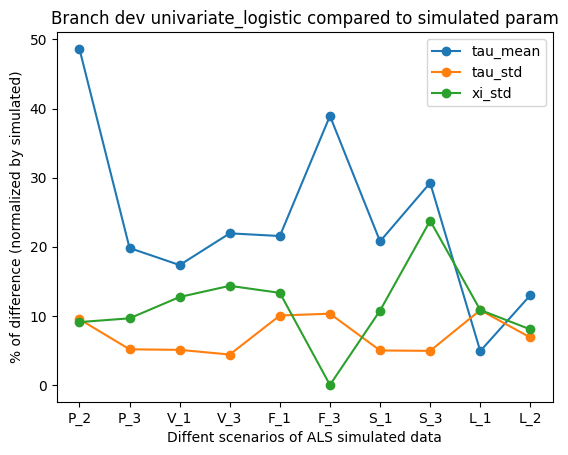

In [7]:
for param in ['tau_mean','tau_std','xi_std']:
    plt.plot(np.arange(len(error[param])), error[param], label = param, marker="o")
    
plt.xticks(np.arange(len(list_scenario)), list_scenario)
plt.legend()
plt.title('Branch dev univariate_logistic compared to simulated param')
plt.ylabel('% of difference (normalized by simulated)')
plt.xlabel('Diffent scenarios of ALS simulated data')
#plt.ylim(-700, 600)
plt.show()

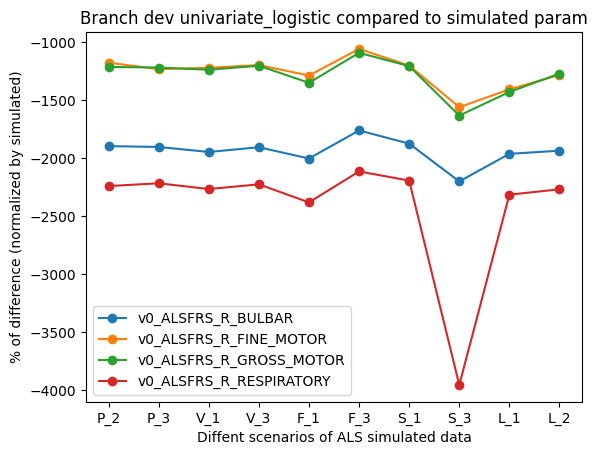

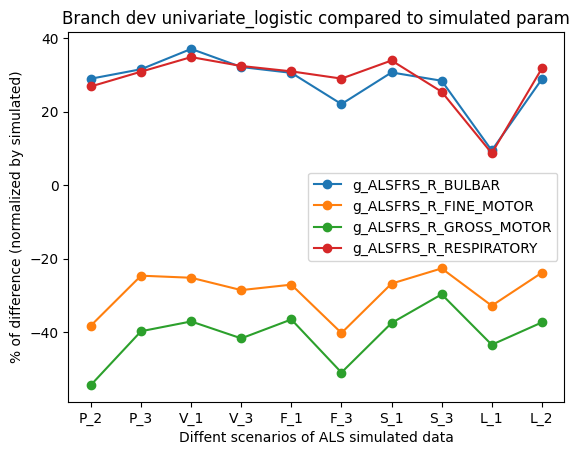

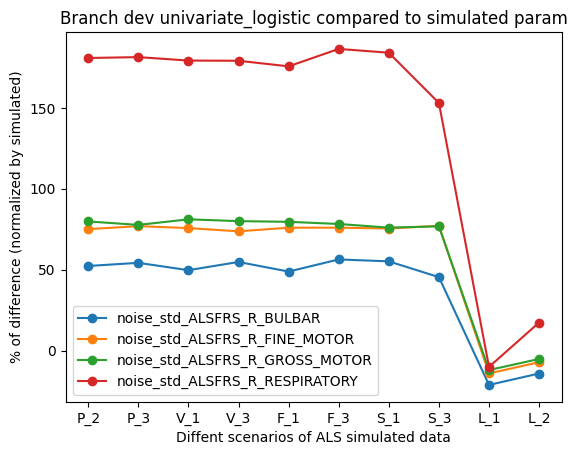

In [8]:
for param in ['v0', 'g', 'noise_std']:
    plt.plot(np.arange(len(error[param])), error[param], 
                 label = [param+'_'+feat for feat in features], marker="o")
    
    plt.xticks(np.arange(len(list_scenario)), list_scenario)
    plt.legend()
    plt.title('Branch dev univariate_logistic compared to simulated param')
    plt.ylabel('% of difference (normalized by simulated)')
    plt.xlabel('Diffent scenarios of ALS simulated data')
    #plt.ylim(-700, 600)
    plt.show()

In [9]:
import pickle
pickle.dump( error, open( "error_master_multi.p", "wb" ) )